## barbel graph experiments

#### GraphCASE

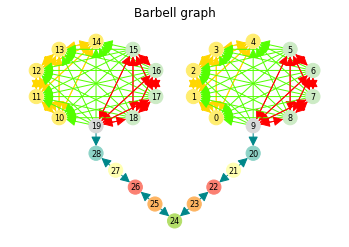

2022-05-30 08:43:59.526378: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Cause: mangled names are not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


2022-05-30 08:44:21.333584: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


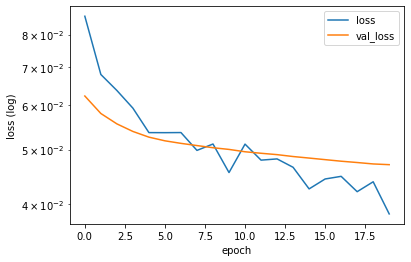

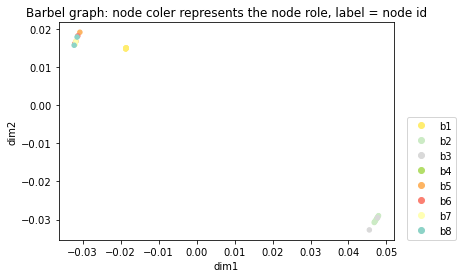

In [2]:
import tensorflow as tf
from graphcase_experiments.experiments.barbell_exp import barbell_exp
from GAE.graph_case_controller import GraphAutoEncoder

params = {'batch_size': 9,
 'hub0_feature_with_neighb_dim': 16,
 'verbose': False,
 'seed': 2,
 'encoder_labels': ['attr1', 'attr2'],
 'learning_rate': 0.002189781523436639,
 'act': tf.nn.sigmoid,
 'useBN': True,
 'dropout': 0.0745080843250766,
 'support_size': [6, 6],
 'dims': [3, 16, 16, 16],
 'epochs': 20000}  #20000

embed, G, tbl = barbell_exp(execute_grid_search=False, algo=GraphAutoEncoder, params=params)

#### MultiLENS

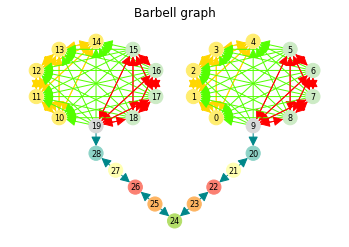

----------------------------------
[Input graph file] graphcase_experiments/algos/processing_files/multilensedge_list.tsv
[Input category file] graphcase_experiments/algos/processing_files/multilenscategories.tsv
[Output embedding file] graphcase_experiments/algos/processing_files/multilensmultilens_embeddings.tsv
[Embedding dimension] 16
[Number of levels] 2
[Base of logarithm binning] 2
[Relational operators] ['mean', 'var', 'sum', 'max', 'min', 'L1', 'L2']
----------------------------------
[weighted graph detected.]
[max_node_id] 28
[num_nodes] 29
[shape of adj_matrix] (29, 29)
[Initial_feature_all finished]
[Generate combined feature vetor] node: 0
Exception: math domain error
Exception: math domain error
Exception: math domain error
Exception: math domain error
Exception: math domain error
Exception: math domain error
Exception: math domain error
Exception: math domain error
Exception: math domain error
Exception: math domain error
Exception: math domain error
Exception: math dom

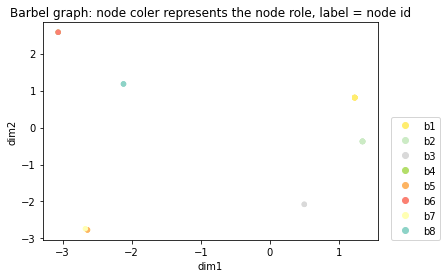

In [9]:
import tensorflow as tf
from graphcase_experiments.experiments.barbell_exp import barbell_exp
from graphcase_experiments.algos.MultiLENSwrapper import MultilensWrapper

params = {
    '--dim': 16,
    '--L': 2,
    '--base': 2
}  

embed, G, tbl = barbell_exp(execute_grid_search=False, algo=MultilensWrapper, params=params)

#### drne

/Users/tonpoppe/opt/anaconda3/envs/graphcase/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


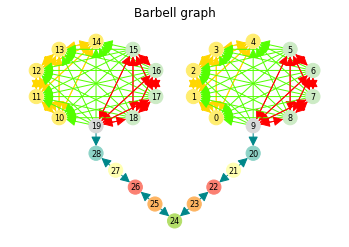

/Users/tonpoppe/opt/anaconda3/envs/drne/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:458: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/tonpoppe/opt/anaconda3/envs/drne/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:459: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/tonpoppe/opt/anaconda3/envs/drne/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:460: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/tonpoppe/opt/anaconda3/e

nodes: 30, edges: 139


2022-05-30 08:43:17.215332: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use SSE4.2 instructions, but these are available on your machine and could speed up CPU computations.
2022-05-30 08:43:17.215365: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use AVX instructions, but these are available on your machine and could speed up CPU computations.
2022-05-30 08:43:17.215369: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use AVX2 instructions, but these are available on your machine and could speed up CPU computations.
2022-05-30 08:43:17.215372: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use FMA instructions, but these are available on your machine and could speed up CPU computations.


max degree: 14
training
batch_size: 4
epoch: 0/20, batch: 0/7, loss: 1.849250, structure_loss: 0.764064, orth_loss: 302.232361, guilded_loss: 2.170372, time: 0.2743s
epoch: 0/20, batch: 1/7, loss: 1.472546, structure_loss: 0.551456, orth_loss: 302.216370, guilded_loss: 1.842178, time: 0.0441s
epoch: 0/20, batch: 2/7, loss: 2.298774, structure_loss: 1.040639, orth_loss: 302.204041, guilded_loss: 2.516271, time: 0.0320s
epoch: 0/20, batch: 3/7, loss: 1.832901, structure_loss: 0.758845, orth_loss: 302.179688, guilded_loss: 2.148113, time: 0.0317s
epoch: 0/20, batch: 4/7, loss: 1.739640, structure_loss: 0.691300, orth_loss: 302.161041, guilded_loss: 2.096682, time: 0.0300s
epoch: 0/20, batch: 5/7, loss: 2.232766, structure_loss: 1.000020, orth_loss: 302.143372, guilded_loss: 2.465493, time: 0.0312s
epoch: 0/20, batch: 6/7, loss: 0.995323, structure_loss: 0.269393, orth_loss: 302.116150, guilded_loss: 1.451860, time: 0.0312s
Save varibales in graphcase_experiments/algos/processing_files/drn

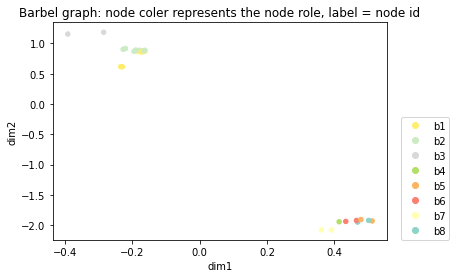

In [1]:
import tensorflow as tf
from graphcase_experiments.experiments.barbell_exp import barbell_exp
from graphcase_experiments.algos.drneWrapper import DrneWrapper

params = {
    '-s': '16',
    '--undirected': 'False'
}  

embed, G, tbl = barbell_exp(execute_grid_search=False, algo=DrneWrapper, params=params)

In [2]:
embed.shape

(29, 17)